In [2]:
from PIL import Image
import numpy as np
import os
import csv

def is_microscope(img: np.ndarray) -> bool:
    """img format [H, W, C], C in [0..256]"""
    N = 10
    THRESHOLD = 10
    return (img[:N, :N, :].mean() < THRESHOLD and
        img[-N:, :N, :].mean() < THRESHOLD and
        img[:N, -N:, :].mean() < THRESHOLD and
        img[-N:, -N:, :].mean() < THRESHOLD)

def path_to_np(img_path: str) -> np.ndarray:
    """img format [H, W, C]"""
    return np.array(Image.open(img_path))

In [3]:
ANNOTATIONS = './melanoma/data/train_concat.csv'
ROOT = './melanoma/data/train/train'
with open(ANNOTATIONS, 'r') as f:
    reader = csv.reader(f)
    rows = list(reader)
    image_name_index = rows[0].index('image_name')
    target_index = rows[0].index('target')
    img_paths = [x[image_name_index] for x in rows[1:]]
    # 1 - melanoma, 0 - not melanoma
    targets = [x[target_index] for x in rows[1:]]

rings = []
nonrings = []
zeros = ones = 0 
for filename, target in zip(img_paths, targets):
    img = path_to_np(os.path.join(ROOT, filename + '.jpg'))
    if is_microscope(img):
        print(filename, target)
        rings.append(img)
        if target == '0':
            zeros += 1
        else:
            ones += 1
    else:
        nonrings.append(img)
print('Non-melanoma samples among microscope images in train set:', zeros)
print('Melanoma samples among microscope images in train set:', ones)

ISIC_0000004 1
ISIC_0000036_downsampled 1
ISIC_0000140_downsampled 1
ISIC_0000276 1
ISIC_0000277 1
ISIC_0000281 1
ISIC_0000282 1
ISIC_0000283 1
ISIC_0000287 1
ISIC_0000290 1
ISIC_0053469 1
ISIC_0053470 1
ISIC_0053479 1
ISIC_0053503 1
ISIC_0053508 1
ISIC_0053513 1
ISIC_0053531 1
ISIC_0053533 1
ISIC_0053541 1
ISIC_0053555 1
ISIC_0053582 1
ISIC_0053594 1
ISIC_0053603 1
ISIC_0053617 1
ISIC_0053644 1
ISIC_0053659 1
ISIC_0053660 1
ISIC_0053674 1
ISIC_0053698 1
ISIC_0053700 1
ISIC_0053702 1
ISIC_0053725 1
ISIC_0053740 1
ISIC_0053742 1
ISIC_0053751 1
ISIC_0053763 1
ISIC_0053766 1
ISIC_0053784 1
ISIC_0053790 1
ISIC_0053791 1
ISIC_0053800 1
ISIC_0053801 1
ISIC_0053816 1
ISIC_0053827 1
ISIC_0053828 1
ISIC_0053841 1
ISIC_0053846 1
ISIC_0053854 1
ISIC_0053884 1
ISIC_0053933 1
ISIC_0053953 1
ISIC_0053960 1
ISIC_0053973 1
ISIC_0053980 1
ISIC_0053981 1
ISIC_0053985 1
ISIC_0054025 1
ISIC_0054062 1
ISIC_0054070 1
ISIC_0054073 1
ISIC_0054079 1
ISIC_0054082 1
ISIC_0054089 1
ISIC_0054090 1
ISIC_0054110 1
I

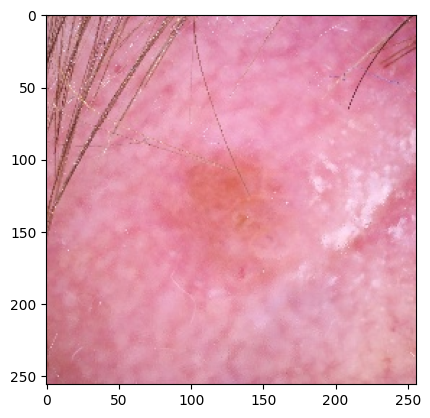

In [4]:
import matplotlib.pyplot as plt
plt.imshow(nonrings[0])

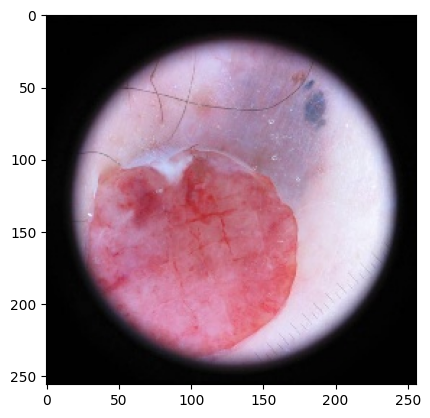

In [5]:
plt.imshow(rings[0])

In [6]:
TEST_ROOT = './melanoma/data/test/test'

for filename in os.listdir(TEST_ROOT):
    img = path_to_np(os.path.join(TEST_ROOT, filename))
    if is_microscope(img):
        print(filename)

In [8]:
os.path.join(ROOT, 'ISIC_0000004' + '.jpg')

'./melanoma/data/train/train/ISIC_0000004.jpg'